In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding
from keras.layers import LSTM
from collections import Counter
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd
import keras
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

Saving final.pickle to final.pickle


In [0]:
max_features = 400000
maxlen = 200
batch_size = 32
epochs = 12


In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# function to load the pickle data
def loadPickleData(filename):
    pickle_off = open(filename,"rb")
    final = pickle.load(pickle_off)
    return final

In [0]:
# load the pickle data
final = loadPickleData('final.pickle')

In [0]:
few_text = final['Text']
final_list =[]
for text in few_text:
    for x in text.split():
        final_list.append(x)

In [0]:
cnt = Counter()
for word in final_list:
    cnt[word]+=1
most_common = cnt.most_common()

In [0]:
word_to_index = dict()
for i,word in enumerate(most_common):
    x,y = word
    word_to_index[x]=i

In [0]:
text = final['Text']
final_no_representation = []
for x in text:
    number_vector = []
    for word in x.split():
        number_vector.append(word_to_index[word])
    
    final_no_representation.append(number_vector)

In [0]:
df = pd.Series(final_no_representation)

In [0]:
y = final['Score']

In [0]:
from keras.utils import to_categorical
y= to_categorical(y)

In [0]:
# splitting the data into train,cv and test 

X_train_1, test_df_1, y_train_1, y_test_1 = train_test_split(df, y, stratify=y, test_size=0.7)

X_train, X_test, y_train, y_test = train_test_split(X_train_1, y_train_1, stratify=y_train_1, test_size=0.2)


In [0]:
x_train = sequence.pad_sequences(X_train,maxlen=maxlen)
x_test = sequence.pad_sequences(X_test,maxlen= maxlen)


In [0]:
model = Sequential()
model.add(Embedding(max_features,123))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(2,activation='sigmoid'))


In [20]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 61544 samples, validate on 15386 samples
Epoch 1/12
61544/61544 [==============================] - 2110s 34ms/step - loss: 0.3467 - acc: 0.8651 - val_loss: 0.2605 - val_acc: 0.9006
Epoch 2/12
61544/61544 [==============================] - 2100s 34ms/step - loss: 0.2243 - acc: 0.9094 - val_loss: 0.2189 - val_acc: 0.9113
Epoch 3/12
61544/61544 [==============================] - 2105s 34ms/step - loss: 0.2018 - acc: 0.9192 - val_loss: 0.2186 - val_acc: 0.9078
Epoch 4/12
61544/61544 [==============================] - 2108s 34ms/step - loss: 0.1907 - acc: 0.9237 - val_loss: 0.2090 - val_acc: 0.9169
Epoch 5/12
61544/61544 [==============================] - 2116s 34ms/step - loss: 0.1804 - acc: 0.9283 - val_loss: 0.2129 - val_acc: 0.9171
Epoch 6/12
61544/61544 [==============================] - 2097s 34ms/step - loss: 0.1704 - acc: 0.9336 - val_loss: 0.2016 - val_acc: 0.9175
Epoch 7/12
61544/61544 [==============================] - 2096s 34ms/step - loss: 0.1601 - acc: 0.9382 - val_l

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.20651610012205063
Test accuracy: 0.923761861440219


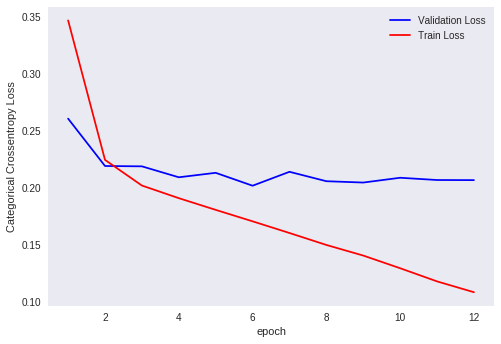

In [27]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Summary**

Model has a test accuracy of 92.3%
